### Summary :
This notebook explores a Logistic Regression and Decision Tree base models, as well as with various SMOTE variations, and Decision Tree and Random Forest models with hyperparameter tuning and PCA, to predict `Amyl` usage. The performance of these models is evaluated using confusion matrices and classification reports.

# INDEX
- [Logistic Regression](#logreg)
- [Coefficient analysis](#Coef)
- [Logistic Regression with SMOTE variations and Confusion Matrix](#logreg_smote)
- [Logistic Regression with ADASYN](#logreg_ADA)
- [Decision Tree](#DT)
- [Decision Tree and Random Forest with PCA](#DTRM)
- [Models Comparison](#Models)
<a id='INDEX'></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency,ttest_ind
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('drug_consumption_model_ready.csv')

I am trying to predict the likelihood of `Amyl` use based on patterns of other drug usage. Going to try Logistic Regression, Decision Tree and Random Forest with PCA and pipeline.

In [3]:
# Split the data into train and test with 75% volume in training dataset and 25% in testing dataset

X = df.drop(['Amyl','Unnamed: 0'],axis=1)
y = df['Amyl']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


### Logistic Regression <a id='logreg'></a>

In [4]:
from sklearn.linear_model import LogisticRegression

# Instantiate logistic regression models
logreg = LogisticRegression()

# Fit models separately on positive and negative reviews
logreg.fit(X_train, y_train)


# Print train and test scores for both models
print((f"Train score: {logreg.score(X_train, y_train)}")) 
print(f"Test score: {logreg.score(X_test, y_test)}")

Train score: 0.9785561115082202
Test score: 0.9850107066381156


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Coefficient analysis <a id='Coef'></a>

In [5]:
#The intercept
intercept = np.exp(logreg.intercept_)

#The coefficients return an array with one entry for each feature. 
#Since this is logistic regression, the coefficients can be interpreted by exponentiating them
coefficient = np.exp(logreg.coef_[0])


print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficient}')

Intercept: [0.99573165]
Coefficients: [0.93813048 0.9611138  0.98478921 0.97852721 0.96973795 1.34824919
 1.21852809 2.12289169 1.63365513 2.02458733 1.61381418 0.89943265
 0.96748363 3.57639427 0.80198426 1.59236689 0.60645573 1.47255779
 2.77761295 0.29866771 1.39057505 1.27482069 2.62621546 0.9693074
 2.09245035 0.85697772 1.14743401 0.65876436 0.76146881 1.5237186
 0.99319973 1.30903532 0.41390421 1.61095852 0.90524419 1.63935252
 1.33610397 1.7023829  1.11759063 0.607019   0.70191895 0.90787851
 3.72299521 0.46162625 0.96135131 0.96890223 1.08721207 1.01141439
 0.55861012]


<Figure size 640x480 with 0 Axes>

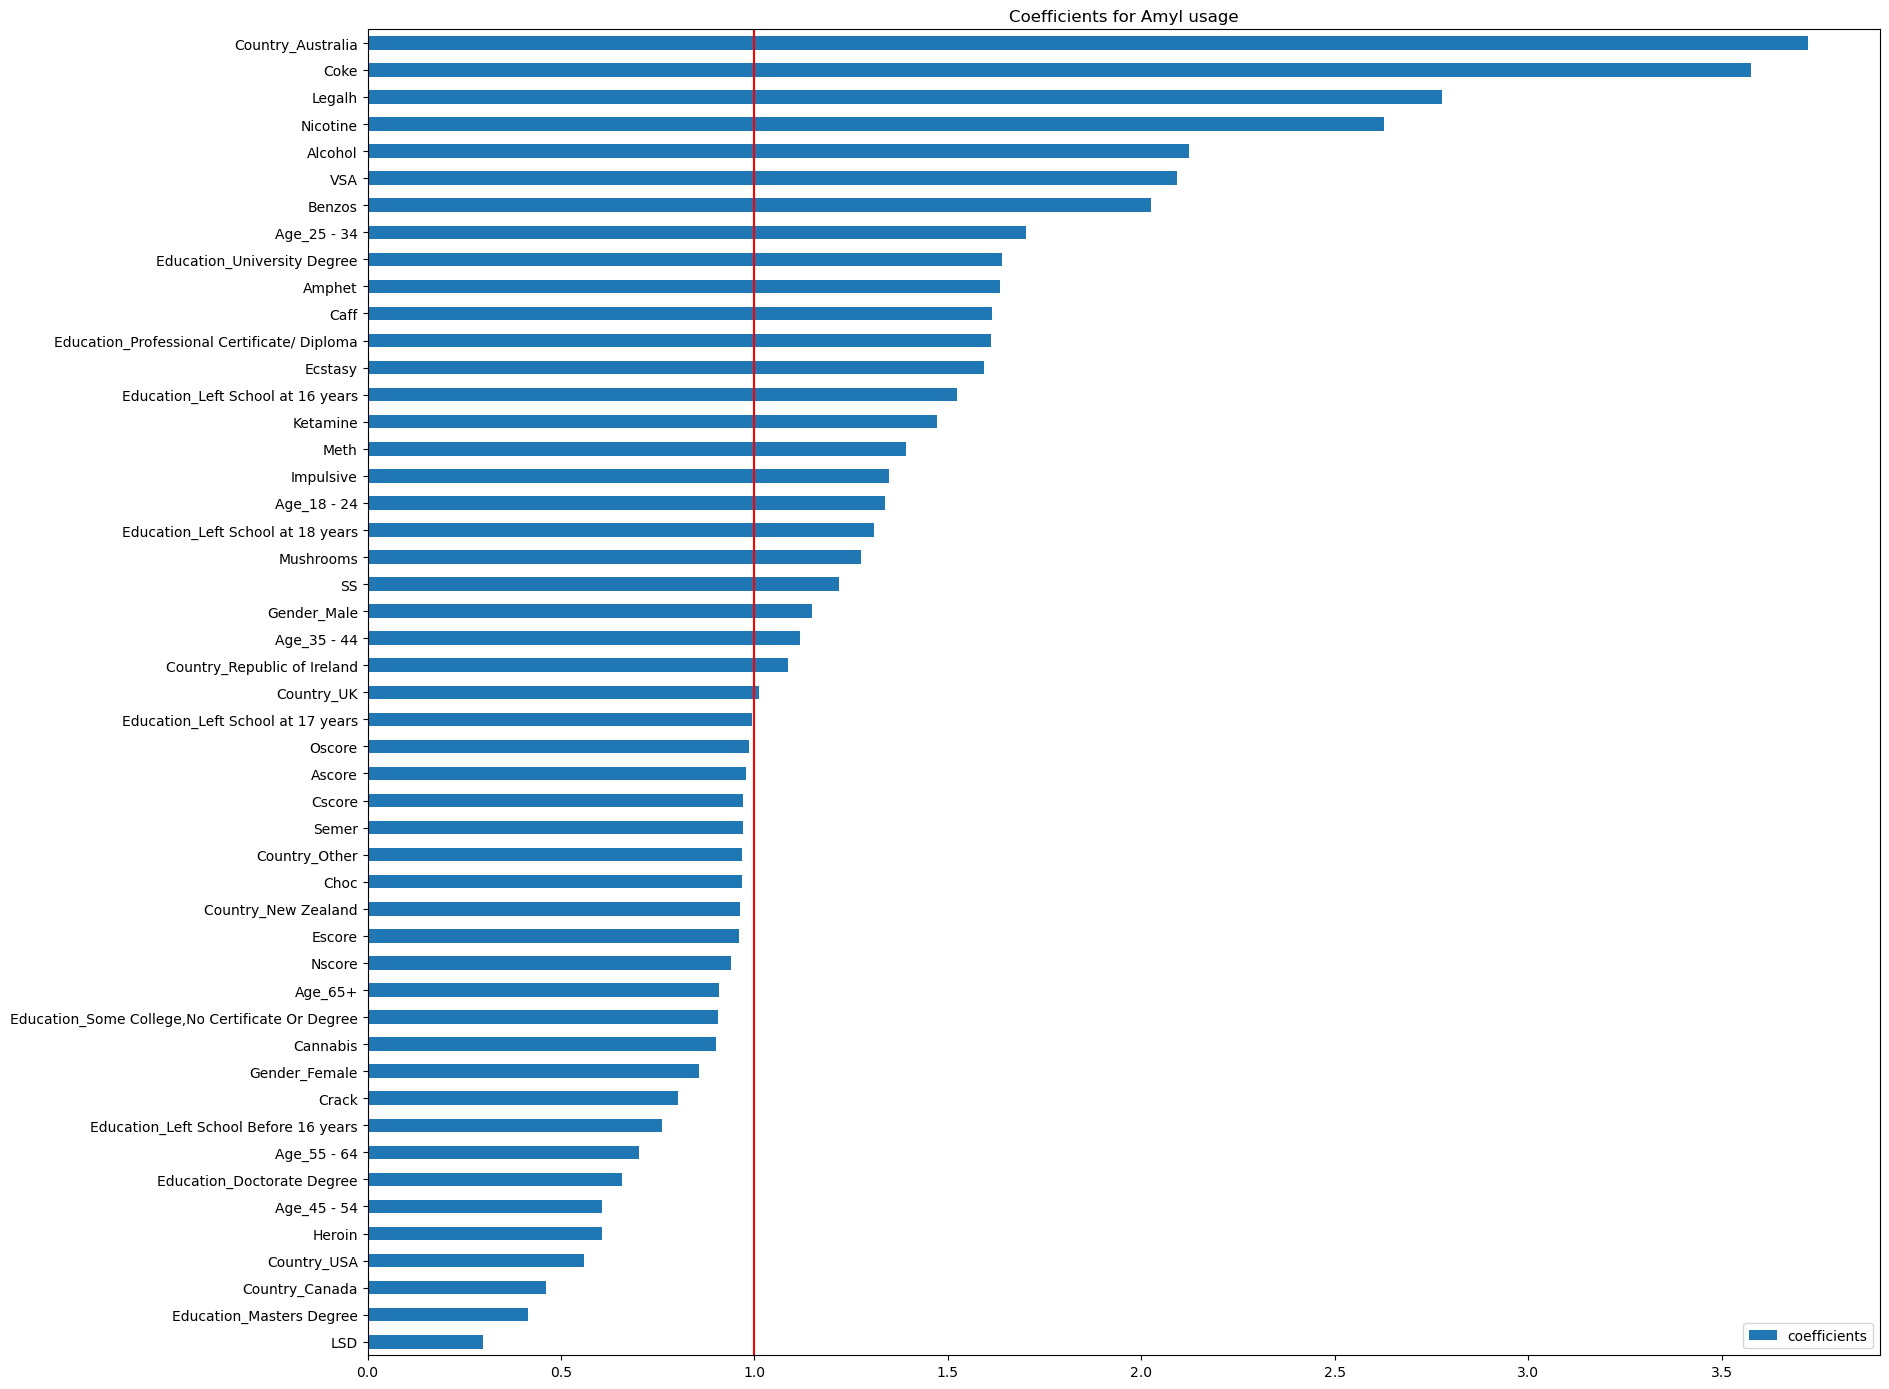

In [7]:
plt.figure()

#Creating a data frame with sorting by 'coefficients'
df1 = pd.DataFrame(
    data={"coefficients": coefficient},
    index=X_train.columns
).sort_values(by="coefficients")

#Plotting the horizontal bar graph
df1.plot(kind="barh", figsize=(19, 14), title="Coefficients for Amyl usage")
plt.axvline(1, c='r')
plt.tight_layout()
plt.show()



The analysis of the coefficients reveals significant factors influencing the model. Substance use (Coke, Legalh, Nicotine, Alcohol, VSA, and Benzos) has the highest impact, with coefficients above 2.0, indicating a strong association. Demographic factors such as age (notably Age 25-34 and 18-24), country (Australia), and education levels (especially those who left school at 16 or have a professional certificate/diploma) also show substantial influence, with coefficients ranging from 1.5 to 1.7. Personality traits like SS and impulsivity  scores contribute moderately, with coefficients around 1.0. Gender and other drugs (e.g., Meth, Ketamine, Ecstasy) also play notable roles, highlighting a multifaceted interplay of demographic, behavioral, and psychological factors in the model.

### Logistic Regression Confusion Matrix <a id='logconf'></a>

array([[460,   1],
       [  6,   0]])

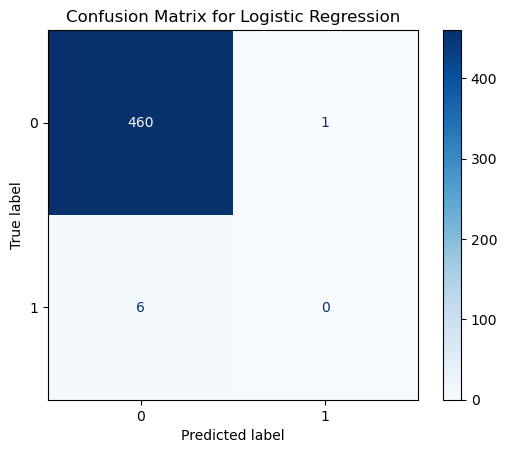

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       461
           1       0.00      0.00      0.00         6

    accuracy                           0.99       467
   macro avg       0.49      0.50      0.50       467
weighted avg       0.97      0.99      0.98       467



In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class predictions
y_pred = logreg.predict(X_test)

# Generate confusion matrix
logreg_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
logreg_df = pd.DataFrame(
    logreg_matrix,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)


display(logreg_matrix)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

#### Summary
The base logistic regression model achieves high accuracy with a train score of 0.979 and a test score of 0.985. However, it performs poorly in identifying the minority class (1), with precision, recall, and f1-score all at 0.00, while excelling in predicting the majority class (0) with near-perfect precision and recall. Overall, the model shows a strong performance in accuracy but lacks in handling class imbalance.

### Logistic Regression with SMOTE variations <a id='logreg_smote'></a>

Results for BorderlineSMOTE:
Best parameters for Logistic Regression:  {'model__C': 10}
Best cross-validation score for Logistic Regression: 0.90
Test set score for Logistic Regression: 0.90

Confusion Matrix:
 [[419  42]
 [  3   3]]



Confusion Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       461
           1       0.07      0.50      0.12         6

    accuracy                           0.90       467
   macro avg       0.53      0.70      0.53       467
weighted avg       0.98      0.90      0.94       467



Results for SMOTEN:
Best parameters for Logistic Regression:  {'model__C': 10}
Best cross-validation score for Logistic Regression: 0.97
Test set score for Logistic Regression: 0.98

Confusion Matrix:
 [[458   3]
 [  5   1]]



Confusion Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       461
           1       0.25      0.17      0.20         6

    

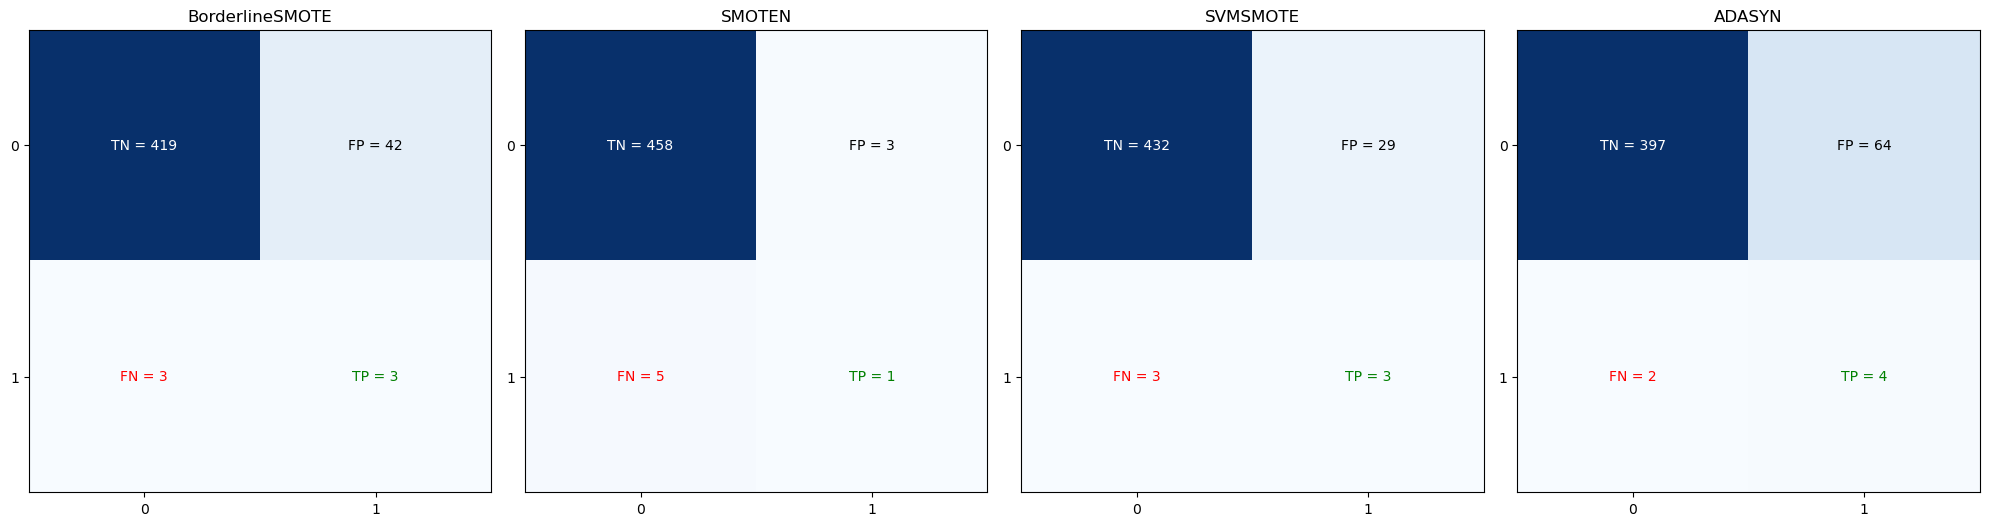

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import BorderlineSMOTE, SMOTEN, SVMSMOTE, KMeansSMOTE, ADASYN
import matplotlib.pyplot as plt

# List of SMOTE variations
smote_variations = [
    ('BorderlineSMOTE', BorderlineSMOTE(random_state=42, sampling_strategy='minority')),
    ('SMOTEN', SMOTEN(random_state=42, sampling_strategy='minority')),
    ('SVMSMOTE', SVMSMOTE(random_state=42, sampling_strategy='minority')),
    ('ADASYN', ADASYN(random_state=42, sampling_strategy='minority'))
]

# Define the parameter grid for GridSearchCV for Logistic Regression
log_param_grid = {
    'model__C': [0.1, 1, 10, 50, 100]
}

# Prepare subplots
fig, axes = plt.subplots(1, len(smote_variations), figsize=(20, 5))

# Loop through each SMOTE variation
for ax, (name, smote) in zip(axes, smote_variations):
    # Define the estimators for the Logistic Regression pipeline
    log_estimators = [
        ('normalize', StandardScaler()),  # Normalize the data
        ('minority', smote),  # Handle imbalanced data with selected SMOTE variation
        ('model', LogisticRegression(max_iter=1000))  # Logistic Regression model
    ]

    # Create the pipeline using imblearn's Pipeline
    log_pipe = ImbPipeline(log_estimators)

    # Create the GridSearchCV object
    log_grid = GridSearchCV(log_pipe, log_param_grid, cv=5)

    # Fit the grid search to the training data (ensure X_train and y_train are defined)
    log_fittedgrid = log_grid.fit(X_train, y_train)

    # Evaluate the best model on the test data (ensure X_test and y_test are defined)
    log_score = log_fittedgrid.score(X_test, y_test)

    # Make predictions using the best model
    y_pred = log_fittedgrid.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    report_initial = classification_report(y_test, y_pred)

    # Print the best parameters and score for Logistic Regression
    print(f"Results for {name}:")
    print("Best parameters for Logistic Regression: ", log_fittedgrid.best_params_)
    print("Best cross-validation score for Logistic Regression: {:.2f}".format(log_fittedgrid.best_score_))
    print("Test set score for Logistic Regression: {:.2f}".format(log_score))
    print("\nConfusion Matrix:\n", cm)
    print("\n")
    print("\nConfusion Report:\n", report_initial)
    print("\n")
    
    # Extract TP, TN, FP, FN
    tn, fp, fn, tp = cm.ravel()
       
    #Set the plot
    ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(name)
    
    # Add labels to the plot
    classes = ['Negative', 'Positive']
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)

    
    # Add TP, TN, FP, FN values to the plot
    ax.text(0, 0, f'TN = {tn}', ha='center', va='center', color='white')
    ax.text(1, 0, f'FP = {fp}', ha='center', va='center', color='black')
    ax.text(0, 1, f'FN = {fn}', ha='center', va='center', color='red')
    ax.text(1, 1, f'TP = {tp}', ha='center', va='center', color='green')     
    
    
#Display the plot
plt.tight_layout()
plt.show()


### Summary of SMOTE Variations
#### BorderlineSMOTE
- **Use Case:** Effective when the decision boundary is critical, and samples near the border are more informative.
- **Summary:** Generates synthetic samples only near the borderline instances, which are difficult to classify. This helps in improving the classifier's performance on challenging cases but might lead to higher false negatives.
#### SVMSMOTE

- **Use Case:** Useful when the decision boundary is complex, and SVM can help in identifying the support vectors that form the boundary.
- **Summary:** Uses Support Vector Machine (SVM) to identify the borderline instances and generate synthetic samples. Balances the data near the decision boundary, improving the model's ability to classify difficult instances correctly.
#### KMeansSMOTE

- **Use Case:** Suitable when the minority class has distinct sub-clusters, and generating samples within these clusters is beneficial.
- **Summary:** Applies KMeans clustering to find sub-clusters within the minority class and generates synthetic samples within these clusters. Helps in better representation of the minority class by preserving the cluster structure but might not always improve true positive rates significantly.
#### ADASYN

- **Use Case:** Ideal when dealing with highly imbalanced datasets where some minority instances are harder to learn.
- **Summary:** ADASYN (Adaptive Synthetic Sampling) focuses on generating more synthetic samples for minority instances that are harder to learn. It adaptively shifts the decision boundary towards the difficult instances, resulting in higher true positive rates but also increasing the number of false positives.

### Summary

The results for logistic regression models using various SMOTE techniques show that SMOTEN achieves the best overall test accuracy at 0.98 and a relatively balanced performance with a macro average precision and recall of 0.62 and 0.58, respectively. While the precision and recall for the minority class (1) are still low, SMOTEN outperforms other methods in identifying the minority class with a precision of 0.25 and a recall of 0.17. Thus, SMOTEN is the best model for handling the minority class in this comparison. While ADASYN performed the best to predict the most minority class (1).


### Logistic Regression with ADASYN <a id='logreg_ADA'></a>

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

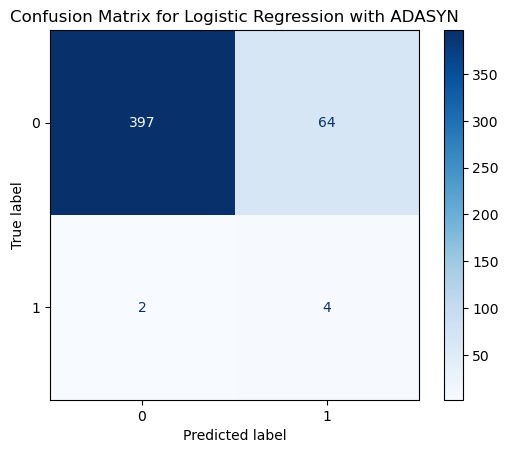

Best parameters for Logistic Regression:  {'C': 8, 'max_iter': 200}
Best cross-validation score for Logistic Regression: 0.85


In [11]:
## Model with ADASYN method to extract coefficient

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply ADASYN to handle imbalanced data
adasyn = ADASYN(random_state=42, sampling_strategy='minority')
X_resampled, y_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# Define the parameter grid for GridSearchCV for Logistic Regression
param_grid = {
    'C': [0.1, 1, 7, 8, 10, 12, 15, 25],
    'max_iter': [100, 200, 500, 1000]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(C=80), param_grid, cv=5)

# Fit the GridSearchCV to the resampled training data
grid_search.fit(X_resampled, y_resampled)

# Get the best estimator
best_log_reg = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_log_reg.predict(X_test_scaled)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression with ADASYN")
plt.show()

# Print the best parameters and score for Logistic Regression
print("Best parameters for Logistic Regression: ", grid_search.best_params_)
print("Best cross-validation score for Logistic Regression: {:.2f}".format(grid_search.best_score_))

# Print the model coefficients with column names, sorted by absolute value
coefficients = best_log_reg.coef_[0]
feature_names = X.columns  # Assuming X is a DataFrame




### Coefficient analysis <a id='Coef'></a>

In [13]:
# Print the model coefficients with column names
coefficients2 = np.exp(best_log_reg.coef_[0])
feature_names = X.columns  # X is a DataFrame


<Figure size 640x480 with 0 Axes>

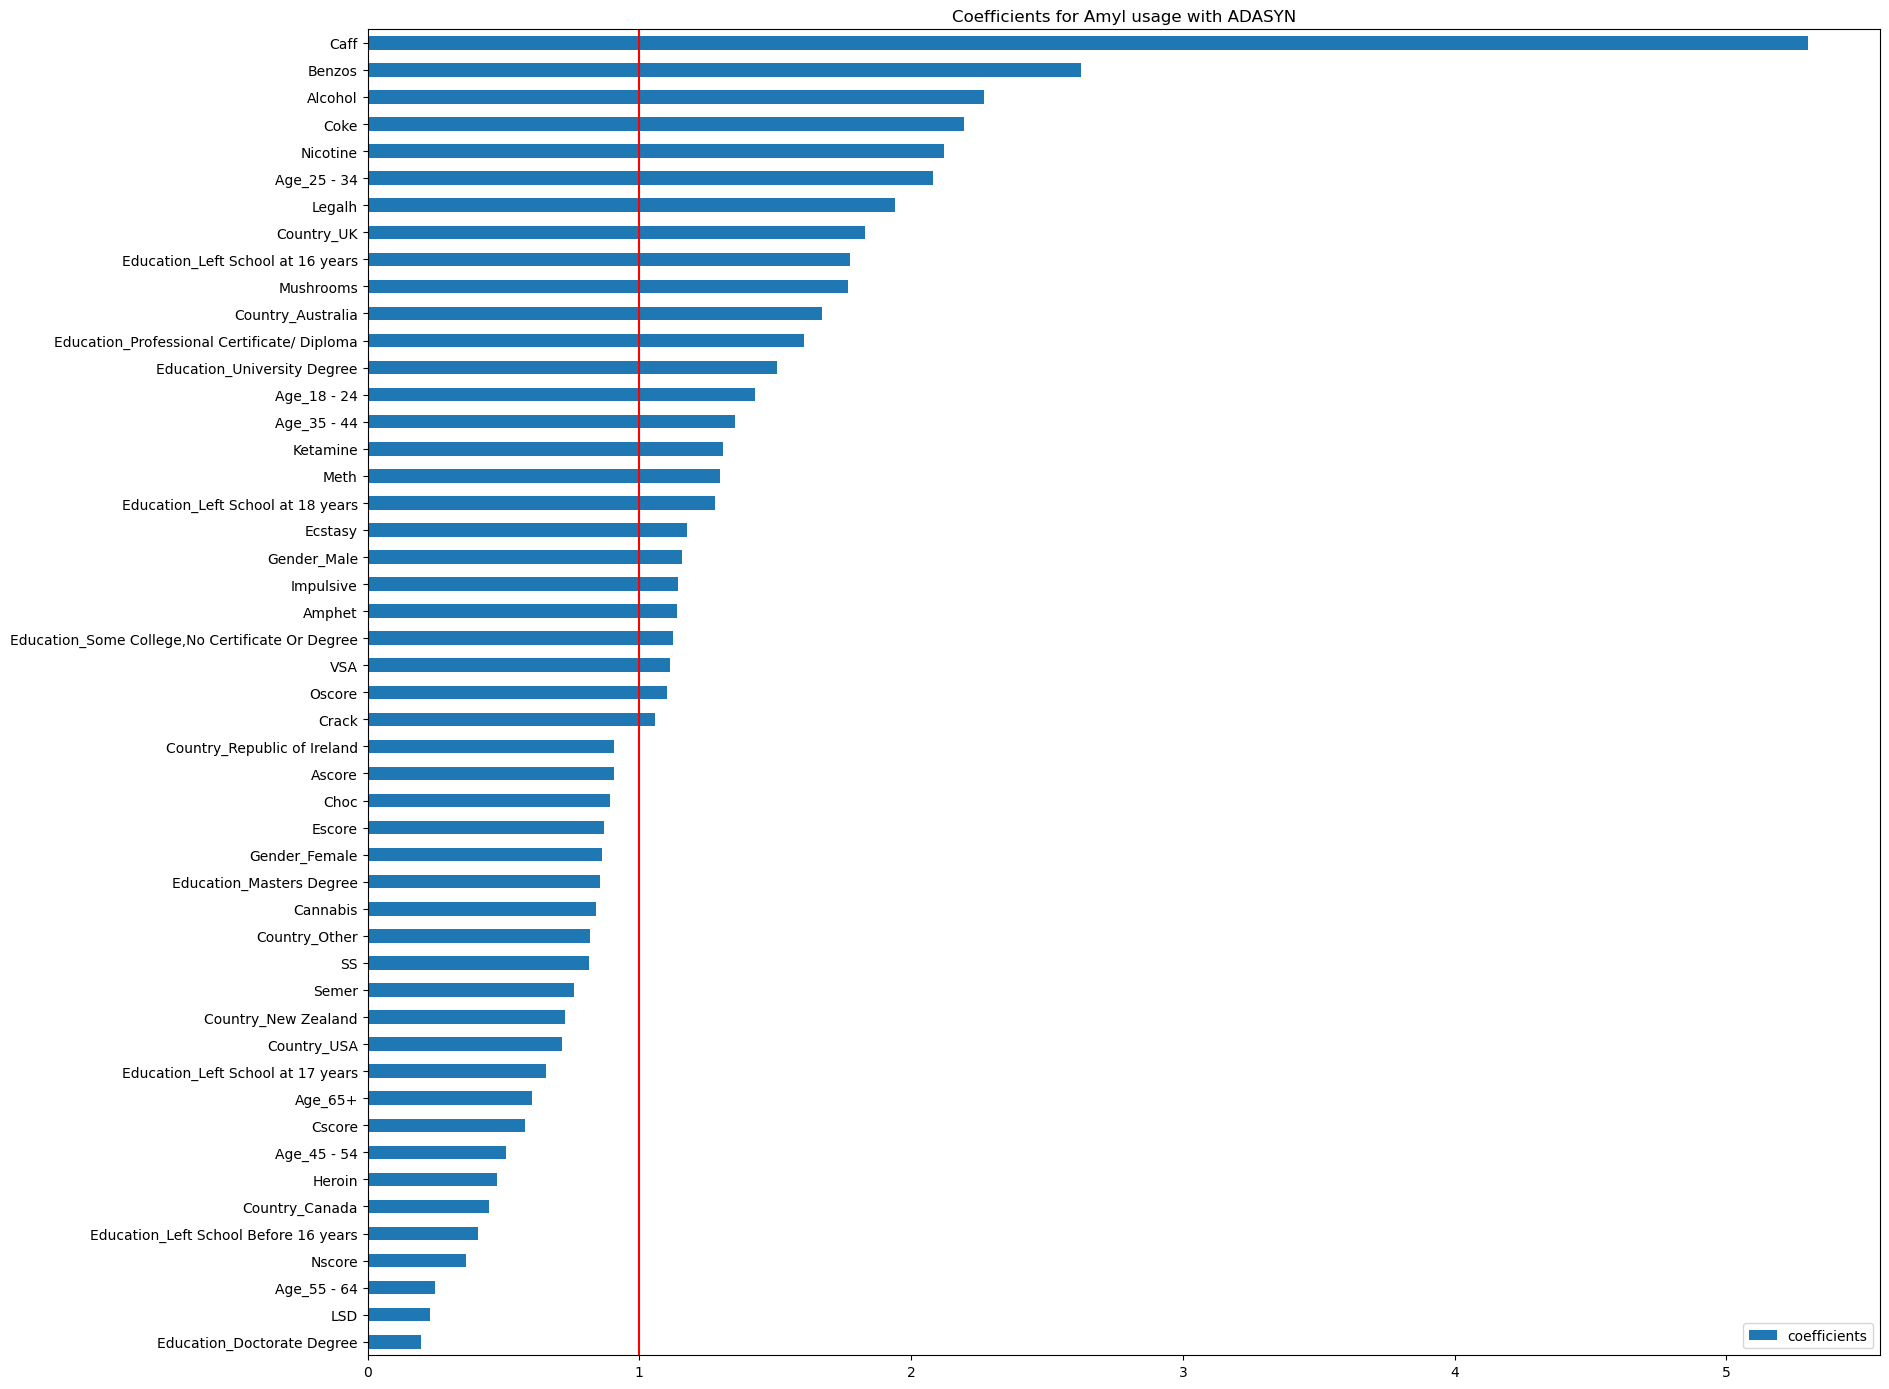

In [14]:
plt.figure()

#Creating a data frame with sorting by 'coefficients'
df2 = pd.DataFrame(
    data={"coefficients": coefficients2},
    index=X.columns
).sort_values(by="coefficients")

#Plotting the horizontal bar graph
df2.plot(kind="barh", figsize=(19, 14), title="Coefficients for Amyl usage with ADASYN")
plt.axvline(1, c='r')
plt.tight_layout()
plt.show()

The coefficients indicate that various demographic, geographic, and personality factors contribute differently to the model. Education, particularly having a professional certificate or diploma and leaving school at 16 years, as well as age groups (especially 25-34), and certain countries (notably Australia and the UK) have strong positive influences. Additionally, consumption of substances like caffeine, nicotine, cocaine, and alcohol are highly influential. Traits such as conscientiousness (Cscore) and neuroticism (Nscore) also play significant roles, with impulsivity being a notable personality factor.

### Decision Tree <a id='DT'></a>

In [16]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)


print(f"The TRAIN classification accuracy is:  {DT.score(X_train,y_train)}")
print(f"The TEST classification accuracy is:  {DT.score(X_test,y_test)}")

The TRAIN classification accuracy is:  1.0
The TEST classification accuracy is:  0.9635974304068522


,Predicted Non-user,Predicted User
True Non-User,449,12
True User,5,1


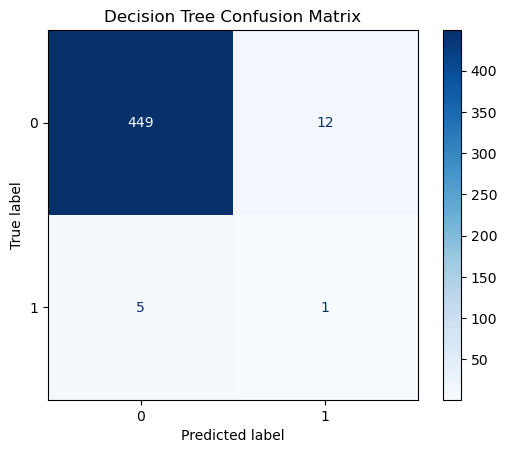

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       461
           1       0.08      0.17      0.11         6

    accuracy                           0.96       467
   macro avg       0.53      0.57      0.54       467
weighted avg       0.98      0.96      0.97       467



In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred1 = DT.predict(X_test)

# Generate confusion matrix
DT_matrix = confusion_matrix(y_test, y_pred1)

# label rows and columns
DT_df = pd.DataFrame(
    DT_matrix,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

display(DT_df)

# the function expects the estimator, inputs and target as parameters
# Evaluate the model
cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report


report_initial_1 = classification_report(y_test, y_pred1)
print(report_initial_1)

#### Summary
The Decision Tree model achieved perfect training accuracy (1.0) and high test accuracy (0.96). For class '0', precision and recall were excellent (0.99 and 0.97, respectively). However, for the minority class '1', precision and recall were low (0.08 and 0.17, respectively), resulting in a low f1-score (0.11). Overall, the model performs well for the majority class but poorly for the minority class as expected.

 ### Decision Tree and Random Forest with PCA <a id='DTRM'></a>

Best parameters for Decision Tree:  {'model__max_depth': 3, 'model__min_impurity_decrease': 0.0, 'model__min_samples_leaf': 20}
Best cross-validation score for Decision Tree: 0.97
Test set score for Decision Tree: 0.99
Best parameters for Random Forest:  {'model__max_depth': 5, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 10}
Best cross-validation score for Random Forest: 0.98
Test set score for Random Forest: 0.99


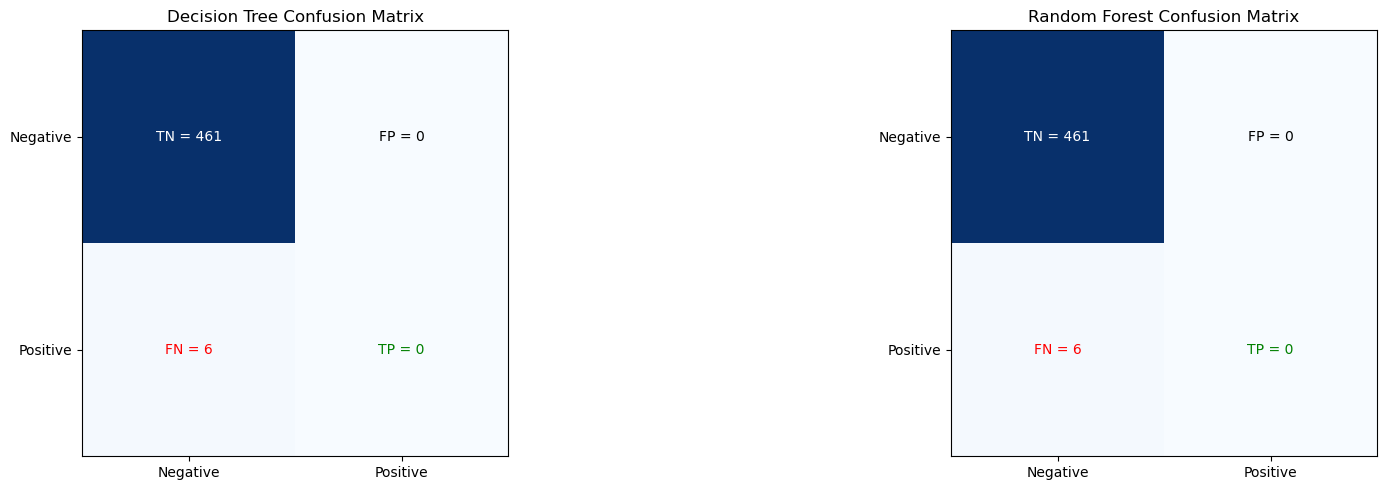

,Predicted Non-user,Predicted User
True Non-User,461,0
True User,6,0


,Predicted Non-user,Predicted User
True Non-User,461,0
True User,6,0



Decision Tree Confusion Matrix:
 [[461   0]
 [  6   0]]

Random Forest Confusion Matrix:
 [[461   0]
 [  6   0]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       461
           1       0.00      0.00      0.00         6

    accuracy                           0.99       467
   macro avg       0.49      0.50      0.50       467
weighted avg       0.97      0.99      0.98       467


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       461
           1       0.00      0.00      0.00         6

    accuracy                           0.99       467
   macro avg       0.49      0.50      0.50       467
weighted avg       0.97      0.99      0.98       467



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tempfile import mkdtemp
import matplotlib.pyplot as plt

# Create a temporary directory for caching the pipeline
cachedir = mkdtemp()

# Define the estimators for the Decision Tree pipeline
dt_estimators = [
    ('normalize', StandardScaler()),  # Normalize the data
    ('reduce_dim', PCA(n_components=20)),  # PCA with 10 components
    ('model', DecisionTreeClassifier())  # Decision Tree model
]

# Define the estimators for the Random Forest pipeline
rf_estimators = [
    ('normalize', StandardScaler()),  # Normalize the data
    ('reduce_dim', PCA(n_components=20)),  # PCA with 10 components
    ('model', RandomForestClassifier())  # Random Forest model
]

# Create the pipelines using scikit-learn's Pipeline
dt_pipe = Pipeline(dt_estimators, memory=cachedir)
rf_pipe = Pipeline(rf_estimators, memory=cachedir)

# Define the parameter grid for GridSearchCV for Decision Tree
dt_param_grid = {
    'model__max_depth': [3, 5, 7, 9, 11, 13, 21],
    'model__min_samples_leaf': [1, 5, 10, 20, 30, 40],
    'model__min_impurity_decrease': [0.0, 0.01, 0.05, 0.1]
}

# Define the parameter grid for GridSearchCV for Random Forest
rf_param_grid = {
    'model__n_estimators': [10, 30, 50, 100],  # Number of trees
    'model__max_depth': [5, 10, 15, 20, 30],  # Maximum depth
    'model__min_samples_split': [2, 5, 7, 10, 15],  # Minimum samples to split
    'model__min_samples_leaf': [1, 2, 4, 8, 10]  # Minimum samples per leaf
}

# Create the GridSearchCV objects
dt_grid = GridSearchCV(dt_pipe, dt_param_grid, cv=5)
rf_grid = GridSearchCV(rf_pipe, rf_param_grid, cv=5)

# Fit the grid search to the training data (ensure X_train and y_train are defined)
dt_fittedgrid = dt_grid.fit(X_train, y_train)
rf_fittedgrid = rf_grid.fit(X_train, y_train)

# Evaluate the best models on the test data (ensure X_test and y_test are defined)
dt_score = dt_fittedgrid.score(X_test, y_test)
rf_score = rf_fittedgrid.score(X_test, y_test)

# Print the best parameters and scores for Decision Tree
print("Best parameters for Decision Tree: ", dt_fittedgrid.best_params_)
print("Best cross-validation score for Decision Tree: {:.2f}".format(dt_fittedgrid.best_score_))
print("Test set score for Decision Tree: {:.2f}".format(dt_score))

# Print the best parameters and scores for Random Forest
print("Best parameters for Random Forest: ", rf_fittedgrid.best_params_)
print("Best cross-validation score for Random Forest: {:.2f}".format(rf_fittedgrid.best_score_))
print("Test set score for Random Forest: {:.2f}".format(rf_score))


# Make predictions using the best models
dt_predictions = dt_fittedgrid.predict(X_test)
rf_predictions = rf_fittedgrid.predict(X_test)

# Compute confusion matrices
dt_cm = confusion_matrix(y_test, dt_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)

# Plot the confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Decision Tree Confusion Matrix
axes[0].imshow(dt_cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('Decision Tree Confusion Matrix')

# Extract TP, TN, FP, FN for Decision Tree
tn, fp, fn, tp = dt_cm.ravel()

# Add TP, TN, FP, FN values to the Decision Tree plot
axes[0].text(0, 0, f'TN = {tn}', ha='center', va='center', color='white')
axes[0].text(1, 0, f'FP = {fp}', ha='center', va='center', color='black')
axes[0].text(0, 1, f'FN = {fn}', ha='center', va='center', color='red')
axes[0].text(1, 1, f'TP = {tp}', ha='center', va='center', color='green')

# Random Forest Confusion Matrix
axes[1].imshow(rf_cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[1].set_title('Random Forest Confusion Matrix')

# Extract TP, TN, FP, FN for Random Forest
tn1, fp1, fn1, tp1 = rf_cm.ravel()

# Add TP, TN, FP, FN values to the Random Forest plot
axes[1].text(0, 0, f'TN = {tn1}', ha='center', va='center', color='white')
axes[1].text(1, 0, f'FP = {fp1}', ha='center', va='center', color='black')
axes[1].text(0, 1, f'FN = {fn1}', ha='center', va='center', color='red')
axes[1].text(1, 1, f'TP = {tp1}', ha='center', va='center', color='green')

# Add labels to the plot
classes = ['Negative', 'Positive']
tick_marks = np.arange(len(classes))
for ax in axes:
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

# Display the plot
plt.tight_layout()
plt.show()

# DT label rows and columns
DT_df = pd.DataFrame(
    dt_cm,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

# RF label rows and columns
RF_df = pd.DataFrame(
    rf_cm,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

# Display confusion matrices as dataframes
display(DT_df)
display(RF_df)

print("\nDecision Tree Confusion Matrix:\n", dt_cm)
print("\nRandom Forest Confusion Matrix:\n", rf_cm)

# Print classification reports
dt_class_report = classification_report(y_test, dt_predictions)
rf_class_report = classification_report(y_test, rf_predictions)

print("\nDecision Tree Classification Report:\n", dt_class_report)
print("\nRandom Forest Classification Report:\n", rf_class_report)


#### Summary:

The Decision Tree model achieved perfect training accuracy (1.0) and high test accuracy (0.96), with strong performance for class '0' (precision and recall both 0.99), but poor performance for the minority class '1' (precision 0.08, recall 0.17). The best Decision Tree parameters improved the test accuracy to 0.99, but did not enhance minority class performance. Similarly, the Random Forest model achieved high accuracy (0.99) with excellent metrics for the majority class, but failed to improve the minority class predictions. Overall, both models perform well for the majority class but struggle with the minority class.

### Model Comparison <a id='Models'></a>

In [19]:
# Create an empty dataframe to store the metrics
metrics_df = pd.DataFrame(columns=['Hyperparameter', 'Training Accuracy', 'Test Accuracy', 'Notes'])

# Logistic Regression baseline
metrics_df.loc['Logistic Regression (Base)'] = ['nan', '97%', '98%', 'High accuracy overall, but fails to predict the minority class']

# Logistic Regression with SMOTE variations
metrics_df.loc['BorderlineSMOTE'] = ['C=10', '90%', '90%', 'Moderate precision and recall balance, significant improvement in handling minority class (recall 0.50)']
metrics_df.loc['SMOTEN'] = ['C=10', '97%', '98%', 'Higher precision, moderate improvement in minority class handling (recall 0.17), overall balanced performance']
metrics_df.loc['SVMSMOTE'] = ['C=0.1', '92%', '93%', 'Balanced precision and recall, moderate improvement in minority class handling (recall 0.50)']
metrics_df.loc['ADASYN'] = ['C=10', '86%', '86%', 'Good precision for majority class, significant improvement in minority class handling (recall 0.67) but lower overall accuracy']

# Decision Tree baseline and tuned
metrics_df.loc['Decision Tree (Base)'] = ['nan', '100%', '96%', 'Perfect training accuracy, but low recall for minority class (0.17) in test']
metrics_df.loc['Decision Tree (Tuned)'] = ['max_depth=3, min_impurity_decrease=0.0, min_samples_leaf=20', '97%', '99%', 'Good precision for majority class, zero recall for minority class, indicating significant imbalance']

# Random Forest tuned
metrics_df.loc['Random Forest'] = ['max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10', '98%', '99%', 'High accuracy with good precision for majority class, but very low recall for minority class']

# Display the dataframe
metrics_df


,Hyperparameter,Training Accuracy,Test Accuracy,Notes
Logistic Regression (Base),nan,97%,98%,"High accuracy overall, but fails to predict th..."
BorderlineSMOTE,C=10,90%,90%,"Moderate precision and recall balance, signifi..."
SMOTEN,C=10,97%,98%,"Higher precision, moderate improvement in mino..."
SVMSMOTE,C=0.1,92%,93%,"Balanced precision and recall, moderate improv..."
ADASYN,C=10,86%,86%,"Good precision for majority class, significant..."
Decision Tree (Base),nan,100%,96%,"Perfect training accuracy, but low recall for ..."
Decision Tree (Tuned),"max_depth=3, min_impurity_decrease=0.0, min_sa...",97%,99%,"Good precision for majority class, zero recall..."
Random Forest,"max_depth=5, min_samples_leaf=1, min_samples_s...",98%,99%,High accuracy with good precision for majority...


### Conclusion:

The baseline Logistic Regression model achieved high accuracy (0.99) but failed to predict the minority class. Using BorderlineSMOTE improved recall for the minority class to 0.50 but reduced overall accuracy (0.90). SMOTEN provided a balance between high overall accuracy (0.98) and moderate improvement for the minority class (recall 0.17). SVMSMOTE offered a similar balance with an accuracy of 0.93 and minority class recall of 0.50. ADASYN increased minority recall (0.67) but reduced overall accuracy (0.86). The Decision Tree and Random Forest models showed high accuracy (0.99) but failed to improve minority class predictions. SMOTEN and SVMSMOTE are the best for minority class prediction, with SMOTEN slightly preferred due to higher overall accuracy.

# INDEX
- [Logistic Regression](#logreg)
- [Coefficient analysis](#Coef)
- [Logistic Regression with SMOTE variations and Confusion Matrix](#logreg_smote)
- [Logistic Regression with ADASYN](#logreg_ADA)
- [Decision Tree](#DT)
- [Decision Tree and Random Forest with PCA](#DTRM)
- [Models Comparison](#Models)
<a id='INDEX'></a>